### Compare results of test input T2D vs UKB T2D

     CHR     GENE      Pval  Pval_0.00  Pval_0.01  Pval_0.04  Pval_0.09  \
0      7     AASS  0.510414   0.529440   0.527758   0.522038   0.510045   
1      7   ABCA13  0.188158   0.296202   0.270620   0.225666   0.193205   
2      7    ABCB1  0.192382   0.110369   0.110528   0.111638   0.115302   
3      7    ABCB4  0.641855   0.702366   0.702648   0.702473   0.698818   
4      7    ABCB5  0.655681   0.440409   0.451979   0.485342   0.531072   
..   ...      ...       ...        ...        ...        ...        ...   
869    7      ZP3  0.209248   0.122559   0.123164   0.125455   0.130552   
870    7     ZPBP  0.158681   0.294497   0.289051   0.273460   0.249830   
871    7  ZSCAN21  0.214376   0.356323   0.346662   0.318806   0.276362   
872    7  ZSCAN25  1.000000   1.000000   1.000000   1.000000   1.000000   
873    7      ZYX  0.116912   0.615056   0.581026   0.488547   0.365363   

     Pval_0.025  Pval_0.50  Pval_1.00  
0      0.454854   0.378288   0.323491  
1      0.163613   0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


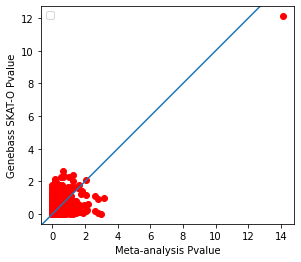

In [17]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

chr20 = pd.read_csv("07_10_data/associations_output_chr20.txt", sep=' ')
chr21 = pd.read_csv("07_10_data/associations_output_chr21.txt", sep=' ')
#gene_bass = pd.read_csv("T2D_EUR_genebass_missense.csv", sep=",")

meta = pd.concat([chr20, chr21])
#meta = pd.read_csv("~/brava/Rare_Variant_Meta/test_output/t2d_chr7_0.01_missense_lof_res.txt", sep=' ')

chr20 = pd.read_csv("07_10_data/gene_associations/.txt", sep=' ')
chr21 = pd.read_csv("07_10_data/associations_output_chr21.txt", sep=' ')
gene_associations = pd.concat([chr20, chr21])


print(meta)

print(gene_bass)

gene_list = list(set(gene_bass["Gene Name"]) & set(meta["GENE"]))

print(len(gene_list))

#assocs_afr = assocs_afr.loc[assocs_afr["Region"].isin(gene_list)] 
#assocs_sas = assocs_sas.loc[assocs_sas["Region"].isin(gene_list)]

fig, ax = plt.subplots()

print(len(meta))

for gene in gene_list:
	if -math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])) > 10:
		print(gene)
	#print(meta.loc[meta["GENE"] == gene],gene_bass.loc[gene_bass["Gene Name"] == gene])
	ax.scatter(-math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])),
		       -math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKATO"])), color="red")
	#print(gene,p,assocs_meta[assocs_meta["GENE"] == gene]["Pval"], assocs_afr[assocs_afr["Region"] == gene]["Pvalue_SKAT"],assocs_sas[assocs_sas["Region"] == gene]["Pvalue_SKAT"])
	#ax.scatter(-math.log(p), -math.log(float(assocs_meta.loc[assocs_meta["GENE"] == gene]["Pval"])), color="blue",s=10)
	#ax.scatter(-math.log(p), -math.log(float(assocs_afr.loc[assocs_afr["Region"] == gene]["Pvalue"])), color="red",s=10)
	#ax.scatter(-math.log(p), assocs_meta.loc[assocs_sas["Region"] == gene]["Pvalue_SKAT"], label="SAS",s=10)

ax.set_xlabel("Meta-analysis Pvalue")
ax.set_ylabel("Genebass SKAT-O Pvalue")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()

In [16]:
gene_bass.loc[gene_bass["Gene Name"] == "GCK"]

,Gene Name,Gene Id,P‑Value SKATO,P‑Value Burden,P‑Value SKAT,BETA Burden,Burden Set,Chrom : Position,Chrom,Position,Details
7338,GCK,ENSG00000106633,0.402846,0.488677,0.279626,-0.001607,synonymous,7.044139e+09,7,44139451.0,NaN


In [33]:
# Calculate proportion of GWAS_summary 'in' gene file

import tqdm

gwas = pd.read_csv("07_10_data/saige/EUR_associations.txt", sep='\t')
gene_file = open('07_10_data/combined_UKB_exome_annos.txt', 'r')
genes = gene_file.readlines()
  
count = 0

all_gene_variants = []

for gene in tqdm.tqdm(genes):
    if count % 2 == 0:
        all_gene_variants.extend(gene.split(" ")[2:])
    count+=1

100%|██████████████████████████████████| 36926/36926 [00:00<00:00, 40290.51it/s]


In [39]:
tmp = []

for variant in tqdm.tqdm(all_gene_variants):
    if variant[0:2] == "20":
        tmp.append(variant)
all_gene_variants = tmp

100%|██████████████████████████| 10906409/10906409 [00:05<00:00, 2027175.70it/s]


In [43]:
found = 0
for var in tqdm.tqdm(gwas["MarkerID"]):
    if var[3:] in all_gene_variants:
        found += 1
        
print(found, len(gwas["MarkerID"]))

100%|████████████████████████████████████| 44077/44077 [01:42<00:00, 430.20it/s]

24992 44077


       CHR      GENE      Pval  Pval_0.00  Pval_0.01  Pval_0.04  Pval_0.09  \
0    chr20   DEFB126  0.207908   0.133448   0.136275   0.145190   0.161384   
1    chr20   DEFB127  0.441428   0.309563   0.309829   0.310395   0.310407   
2    chr20   DEFB128  0.093801   0.212902   0.207165   0.190838   0.166555   
3    chr20   DEFB129  0.682723   0.557074   0.558559   0.562235   0.566140   
4    chr20   DEFB132  0.556246   0.387306   0.392883   0.409374   0.435854   
..     ...       ...       ...        ...        ...        ...        ...   
133  chr21    MCM3AP  0.368016   1.000000   1.000000   1.000000   1.000000   
134  chr21  C21orf58  0.632357   0.416810   0.409640   0.446003   0.495087   
135  chr21      PCNT  0.140969   1.000000   1.000000   1.000000   1.000000   
136  chr21     DIP2A  0.682618   0.613982   0.599565   0.745782   0.637009   
137  chr21     PRMT2  0.923539   1.000000   1.000000   1.000000   1.000000   

     Pval_0.025  Pval_0.50  Pval_1.00  
0      0.221497   0.326

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


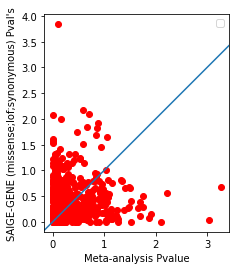

In [105]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

chr20 = pd.read_csv("07_10_data/associations_output_chr20.txt", sep=' ')
chr21 = pd.read_csv("07_10_data/associations_output_chr21.txt", sep=' ')

meta = pd.concat([chr20, chr21])
#meta = pd.read_csv("~/brava/Rare_Variant_Meta/test_output/t2d_chr7_0.01_missense_lof_res.txt", sep=' ')

chr20 = pd.read_csv("07_10_data/saige/gene_associations/chr20.txt", sep='\t')
chr21 = pd.read_csv("07_10_data/saige/gene_associations/chr21.txt", sep='\t')
gene_associations = pd.concat([chr20, chr21])


print(meta)

print(gene_bass)

gene_list = list(set(gene_associations["Region"]) & set(meta["GENE"]))

print(len(gene_list))

#assocs_afr = assocs_afr.loc[assocs_afr["Region"].isin(gene_list)] 
#assocs_sas = assocs_sas.loc[assocs_sas["Region"].isin(gene_list)]

fig, ax = plt.subplots()

print(len(meta))

for gene in gene_list:
	if -math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])) > 10:
		print(gene)
	#print(meta.loc[meta["GENE"] == gene],gene_bass.loc[gene_bass["Gene Name"] == gene])
	ax.scatter(-math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])),
		       -math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="missense;lof") & (gene_associations["max_MAF"]==0.0001)]["Pvalue"])), color="red")
	#print(gene,p,assocs_meta[assocs_meta["GENE"] == gene]["Pval"], assocs_afr[assocs_afr["Region"] == gene]["Pvalue_SKAT"],assocs_sas[assocs_sas["Region"] == gene]["Pvalue_SKAT"])
	#ax.scatter(-math.log(p), -math.log(float(assocs_meta.loc[assocs_meta["GENE"] == gene]["Pval"])), color="blue",s=10)
	#ax.scatter(-math.log(p), -math.log(float(assocs_afr.loc[assocs_afr["Region"] == gene]["Pvalue"])), color="red",s=10)
	#ax.scatter(-math.log(p), assocs_meta.loc[assocs_sas["Region"] == gene]["Pvalue_SKAT"], label="SAS",s=10)

ax.set_xlabel("Meta-analysis Pvalue")
ax.set_ylabel("SAIGE-GENE (missense;lof;synonymous) Pval's")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()

,Region,Group,max_MAF,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,MAC_case,MAC_control,Number_rare,Number_ultra_rare
7,DEFB125,missense;lof;synonymous,0.001,0.725789,0.508798,0.704198,0.003204,0.00485,1037.0,82.0,955.0,16.0,0.0


        Gene Name          Gene Id  P‑Value SKATO  P‑Value Burden  \
0             GCK  ENSG00000106633   7.566589e-13    5.607485e-13   
1            ANKH  ENSG00000154122   1.122092e-10    5.389459e-05   
2         MAP3K15  ENSG00000180815   1.957281e-05    1.544252e-05   
3          ZNF771  ENSG00000179965   6.850809e-05    1.418554e-04   
4          ANTKMT  ENSG00000103254   9.821107e-05    8.182425e-03   
...           ...              ...            ...             ...   
19398  AC011455.2  ENSG00000269547            NaN             NaN   
19399     GPIHBP1  ENSG00000277494            NaN             NaN   
19400    C11orf98  ENSG00000278615            NaN             NaN   
19401  AC068547.1  ENSG00000283228            NaN             NaN   
19402  AC018362.3  ENSG00000285942            NaN             NaN   

       P‑Value SKAT  BETA Burden   Burden Set  Chrom : Position Chrom  \
0      8.440242e-06     0.046521  missense|LC      7.044139e+09     7   
1      1.602988e-11    -0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.18019693379956192, 2.2169586421385016e-06)


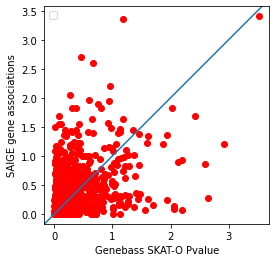

In [132]:
# Comparing genebass vs saige gene

import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from scipy.stats.stats import pearsonr   

#chr20 = pd.read_csv("07_10_data/associations_output_chr20.txt", sep=' ')
#chr21 = pd.read_csv("07_10_data/associations_output_chr21.txt", sep=' ')
gene_bass = pd.read_csv("T2D_EUR_genebass_missense.csv", sep=",")

#meta = pd.concat([chr20, chr21])
#meta = pd.read_csv("~/brava/Rare_Variant_Meta/test_output/t2d_chr7_0.01_missense_lof_res.txt", sep=' ')

chr20 = pd.read_csv("07_10_data/saige/gene_associations/chr20.txt", sep='\t')
chr21 = pd.read_csv("07_10_data/saige/gene_associations/chr21.txt", sep='\t')
gene_associations = pd.concat([chr20, chr21])

print(gene_bass)

gene_list = list(set(gene_bass["Gene Name"]) & set(gene_associations["Region"]))

print(len(gene_list))

#assocs_afr = assocs_afr.loc[assocs_afr["Region"].isin(gene_list)] 
#assocs_sas = assocs_sas.loc[assocs_sas["Region"].isin(gene_list)]

fig, ax = plt.subplots()

print(len(meta))

a = []
b = []

for gene in gene_list:
    try:
        ax.scatter(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"])),
                 -math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="missense;lof") & (gene_associations["max_MAF"]==0.01)]["Pvalue"])), color="red")
        a.append(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"]))
        b.append(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="missense;lof") & (gene_associations["max_MAF"]==0.01)]["Pvalue"]))
    except:pass
    
ax.set_ylabel("SAIGE gene associations")
ax.set_xlabel("Genebass SKAT-O Pvalue")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

print(pearsonr(a,b))

plt.show()

511
511


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


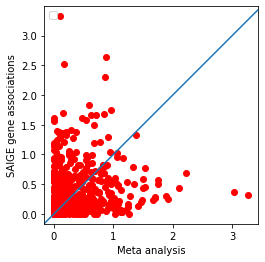

In [131]:
# Comparing SAIGE gene vs meta analysis

import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

chr20 = pd.read_csv("07_10_data/associations_output_chr20.txt", sep=' ')
chr21 = pd.read_csv("07_10_data/associations_output_chr21.txt", sep=' ')

meta = pd.concat([chr20, chr21])

chr20 = pd.read_csv("07_10_data/saige/gene_associations/chr20.txt", sep='\t')
chr21 = pd.read_csv("07_10_data/saige/gene_associations/chr21.txt", sep='\t')
gene_associations = pd.concat([chr20, chr21])

gene_list = list(set(meta["GENE"]) & set(gene_associations["Region"]))

print(len(gene_list))

#assocs_afr = assocs_afr.loc[assocs_afr["Region"].isin(gene_list)] 
#assocs_sas = assocs_sas.loc[assocs_sas["Region"].isin(gene_list)]

fig, ax = plt.subplots()

print(len(meta))

for gene in gene_list:
    ax.scatter(-math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])),
               -math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="missense;lof;synonymous") & (gene_associations["max_MAF"]==0.0001)]["Pvalue"])), color="red")

ax.set_ylabel("SAIGE gene associations")
ax.set_xlabel("Meta analysis")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()

In [128]:
print(gene_associations[100:])

     Region                    Group  max_MAF    Pvalue  Pvalue_Burden  \
100   TRIB3  missense;lof;synonymous   0.0001  0.585028       0.370824   
101   TRIB3  missense;lof;synonymous   0.0010  0.805298       0.857799   
102   TRIB3  missense;lof;synonymous   0.0100  0.438263       0.409433   
103   TRIB3                   Cauchy      NaN  0.650423       0.572963   
104   RBCK1             missense;lof   0.0001  0.133027       0.071525   
...     ...                      ...      ...       ...            ...   
1725  PRMT2             missense;lof   0.0100  0.867712       0.713380   
1726  PRMT2  missense;lof;synonymous   0.0001  0.770938       0.924275   
1727  PRMT2  missense;lof;synonymous   0.0010  0.817967       0.653412   
1728  PRMT2  missense;lof;synonymous   0.0100  0.846544       0.645650   
1729  PRMT2                   Cauchy      NaN  1.000000       0.851696   

      Pvalue_SKAT  BETA_Burden  SE_Burden      MAC  MAC_case  MAC_control  \
100      0.970634    -0.003523   0

In [4]:
import tqdm
import pandas as pd

gene_file = open('07_10_data/combined_UKB_exome_annos.txt', 'r')
genes = gene_file.readlines()
  
count = 0

all_gene_variants = []
plof_vars = []

new_annos_full = ""
new_annos = ""
for gene in tqdm.tqdm(genes):
    if count % 2 == 1:

        new_annos = ""
        new_annos += gene.split(" ")[0]
        new_annos += " "
        new_annos += "var"
        
        n = 0
        
        for anno, var in zip(gene.split(" ")[2:], all_gene_variants):
            if anno == "lof":
                n += 1
                new_annos += " "
                new_annos += var
        if n == 0: continue
        new_annos += "\n"
        new_annos += gene.split(" ")[0]
        new_annos += " anno"
        new_annos += " lof" * n
        new_annos += "\n"
        
        new_annos_full += new_annos
        
    if count % 2 == 0:
        all_gene_variants = gene.split(" ")[2:]
    count+=1

100%|██████████████████████████████████| 36926/36926 [00:03<00:00, 10203.42it/s]


In [140]:
with open('lof.txt', 'w') as f:
    for line in plof_vars:
        f.write(f"{line}\n")

In [5]:
with open('lof_annos.txt', 'w') as f:
    f.write(new_annos_full)

In [1]:
import tqdm
import pandas as pd

gene_file = open('07_10_data/combined_UKB_exome_annos.txt', 'r')
genes = gene_file.readlines()
  
count = 0

all_gene_variants = []
synonymous_vars = []

for gene in tqdm.tqdm(genes):
    if count % 2 == 1:
        for anno, var in zip(gene.split(" ")[2:], all_gene_variants):
            if anno == "synonymous":
                synonymous_vars.append("chr" + var)

    if count % 2 == 0:
        all_gene_variants = gene.split(" ")[2:]
    
    count+=1

100%|██████████████████████████████████| 36926/36926 [00:02<00:00, 14051.06it/s]


In [7]:
plof_vars[0:10]

['10:47064:ACCTCCTCCTCGGCATACTCCTCATCCT:A',
 '10:47065:CCTCCTCCTCGGCATA:C',
 '10:47080:ACTC:A',
 '10:47085:T:TC',
 '10:47087:A:ATCC',
 '10:47087:ATCC:A',
 '10:47116:G:A',
 '10:47122:G:A',
 '10:47190:T:TC',
 '10:47202:C:CA']

In [2]:
with open('synonymous.txt', 'w') as f:
    for line in synonymous_vars:
        f.write(f"{line}\n")

/var/folders/ks/4xyv63yj03zgqh2vxrfmg6hrb4lqvc/T/ipykernel_20399/1034958258.py:8: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


643


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


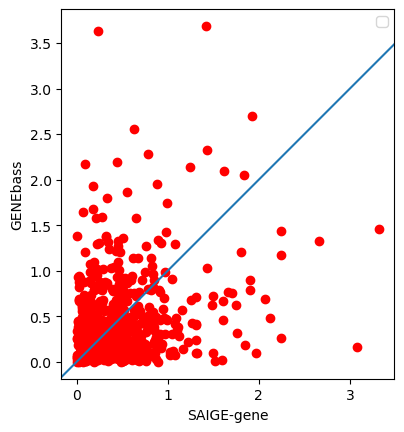

pearson: PearsonRResult(statistic=0.24503403931127143, pvalue=6.680572897309264e-10)
287


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


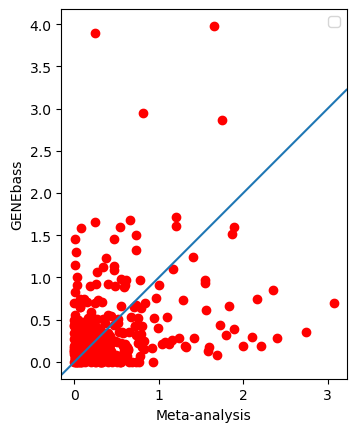

pearson: PearsonRResult(statistic=0.24428719383147934, pvalue=3.3677155844641184e-05)
300


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


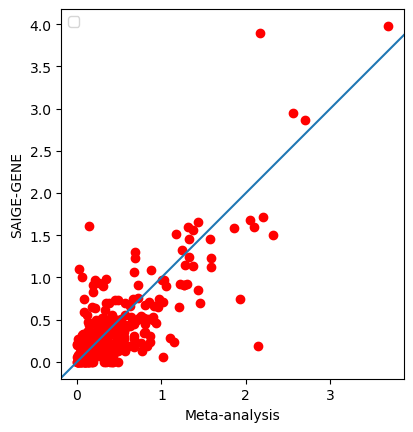

pearson: PearsonRResult(statistic=0.7904885616346519, pvalue=2.0817152360946734e-65)


In [8]:
# Analysis of SAIGE, META results with lof-annotations
import sys
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import tqdm
from scipy.stats.stats import pearsonr   

gene_bass = pd.read_csv("14_11_data/genebass/pLoF.csv", sep=",")

## SAIGE-gene vs genebass

chr20 = pd.read_csv("14_11_data/saige-gene/chr20.txt", sep='\t')
chr21 = pd.read_csv("14_11_data/saige-gene/chr21.txt", sep='\t')

gene_associations = pd.concat([chr20, chr21])

gene_list = list(set(gene_bass["Gene Name"]) & set(gene_associations["Region"]))

print(len(gene_list))

fig, ax = plt.subplots()

x=[]
y=[]

for gene in gene_list:
    x.append(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value Burden"])))
    y.append(-math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="lof") & (gene_associations["max_MAF"]==0.0100)]["Pvalue_Burden"])))
    
    ax.scatter(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value Burden"])),
               -math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="lof") & (gene_associations["max_MAF"]==0.0100)]["Pvalue_Burden"])), color="red")


ax.set_ylabel("GENEbass")
ax.set_xlabel("SAIGE-gene")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()

x,y=np.array(x),np.array(y)
good = ~np.logical_or(np.isnan(x), np.isnan(y))
print("pearson:", pearsonr(x[good],y[good]))

## genebass vs meta-analysis

chr20 = pd.read_csv("14_11_data/meta-analysis/chr20.txt", sep=' ')
chr21 = pd.read_csv("14_11_data/meta-analysis/chr21.txt", sep=' ')

meta = pd.concat([chr20, chr21])

gene_list = list(set(gene_bass["Gene Name"]) & set(meta["GENE"]))

print(len(gene_list))

#assocs_afr = assocs_afr.loc[assocs_afr["Region"].isin(gene_list)] 
#assocs_sas = assocs_sas.loc[assocs_sas["Region"].isin(gene_list)]

fig, ax = plt.subplots()

x,y=[],[]

for gene in gene_list:
    x.append(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"])))
    y.append(-math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])))

    ax.scatter(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"])),
               -math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])), color="red")

ax.set_ylabel("GENEbass")
ax.set_xlabel("Meta-analysis")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()
x,y=np.array(x),np.array(y)
good = ~np.logical_or(np.isnan(x), np.isnan(y))
print("pearson:", pearsonr(x[good],y[good]))

## SAIGE-gene vs META analysis

gene_list = list(set(gene_associations["Region"]) & set(meta["GENE"]))

print(len(gene_list))

fig, ax = plt.subplots()

x,y=[],[]

for gene in gene_list:
    x.append(-math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="lof") & (gene_associations["max_MAF"]==0.0100)]["Pvalue_Burden"])))
    y.append(-math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])))

    ax.scatter(-math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="lof") & (gene_associations["max_MAF"]==0.0100)]["Pvalue_Burden"])),
               -math.log10(float(meta.loc[meta["GENE"] == gene]["Pval"])), color="red")

ax.set_ylabel("SAIGE-GENE")
ax.set_xlabel("Meta-analysis")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()
x,y=np.array(x),np.array(y)
good = ~np.logical_or(np.isnan(x), np.isnan(y))
print("pearson:", pearsonr(x[good],y[good]))

/var/folders/ks/4xyv63yj03zgqh2vxrfmg6hrb4lqvc/T/ipykernel_95177/1986755792.py:9: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


       Region                              Group  max_MAF    Pvalue  \
0     DEFB125                  damaging_missense   0.0001  0.332759   
1     DEFB125                  damaging_missense   0.0010  0.332759   
2     DEFB125                  damaging_missense   0.0100  0.332759   
3     DEFB125                               pLoF   0.0001  0.030479   
4     DEFB125                               pLoF   0.0010  0.030479   
...       ...                                ...      ...       ...   
2967    PRMT2             pLoF;damaging_missense   0.0100  0.892646   
2968    PRMT2  damaging_missense;pLoF;synonymous   0.0001  0.597469   
2969    PRMT2  damaging_missense;pLoF;synonymous   0.0010  0.722174   
2970    PRMT2  damaging_missense;pLoF;synonymous   0.0100  0.896392   
2971    PRMT2                             Cauchy      NaN  0.872789   

      Pvalue_Burden  Pvalue_SKAT  BETA_Burden  SE_Burden     MAC  MAC_case  \
0          0.332759     0.332759     0.077547   0.080063     1.0     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


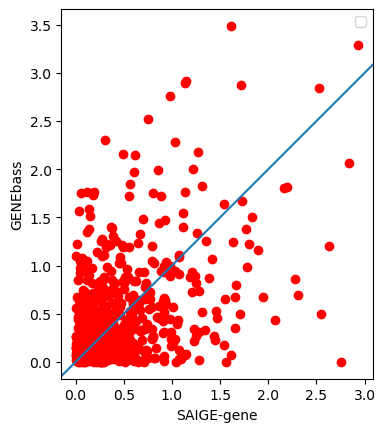

pearson: PearsonRResult(statistic=0.30287866912675643, pvalue=5.041688518203697e-15)


In [36]:
## SAIGE-gene VEP vs genebass

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import math
import mygene
from scipy.stats.stats import pearsonr   

#gene_bass = pd.read_csv("T2D_EUR_genebass_missense.csv", sep=",")
gene_bass = pd.read_csv("24_11_data/genebass_plof_hypertension.csv", sep=",")

chr20 = pd.read_csv("25_11_data/chr20_hypertension_with_new_covars.txt", sep='\t')
chr21 = pd.read_csv("25_11_data/chr21_hypertension_with_new_covars.txt", sep='\t')

gene_associations = pd.concat([chr20, chr21])

#gene_associations = pd.read_csv("24_11_data/SAS.txt", sep='\t')
rerun=False

if not 'gene_map' in locals() or rerun==True:

    mg = mygene.MyGeneInfo()
    gene_map = {}
    for gene in tqdm.tqdm(gene_associations["Region"]):
        if gene in gene_map: continue
        try: gene_map[gene] = mg.getgene(gene)["symbol"]
        except: pass

gene_associations['Region'] = gene_associations['Region'].map(gene_map)

print(gene_associations)

gene_list = list(set(gene_bass["Gene Name"]) & set(gene_associations["Region"]))

print(len(set(gene_associations["Region"])))
print(len((set(gene_bass["Gene Name"]))))
print(len(gene_list))

fig, ax = plt.subplots()

x=[]
y=[]

for gene in gene_list:
    try: x.append(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"]))
    except: continue
    try:y.append(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="pLoF") & (gene_associations["max_MAF"]==0.01)]["Pvalue_SKAT"]))
    except:
        x.pop()
        continue
    try:
        ax.scatter(-math.log10(float(gene_bass.loc[gene_bass["Gene Name"] == gene]["P‑Value SKAT"])),
                   -math.log10(float(gene_associations.loc[(gene_associations["Region"] == gene) & (gene_associations["Group"]=="pLoF") & (gene_associations["max_MAF"]==0.01)]["Pvalue_SKAT"])), color="red")
    except: pass
ax.set_ylabel("GENEbass")
ax.set_xlabel("SAIGE-gene")
ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()

x,y=np.array(x),np.array(y)
good = ~np.logical_or(np.isnan(x), np.isnan(y))
print("pearson:", pearsonr(x[good],y[good]))

In [2]:
'gene_map' in locals()


True

In [9]:
import mygene
import tqdm
mg = mygene.MyGeneInfo()
for gene in tqdm.tqdm(gene_associations["Region"]):
    if gene in gene_map: continue
    try: gene_map[gene] = mg.getgene(gene)["symbol"]
    except: pass

  0%|                                                                                          | 0/11306 [00:00<?, ?it/s]

nan


  0%|                                                                                | 1/11306 [00:00<1:12:18,  2.61it/s]

nan


  0%|                                                                                | 2/11306 [00:00<1:11:41,  2.63it/s]

nan


  0%|                                                                                | 3/11306 [00:01<1:12:53,  2.58it/s]

nan


  0%|                                                                                | 4/11306 [00:01<1:12:32,  2.60it/s]

nan


  0%|                                                                                | 5/11306 [00:01<1:11:47,  2.62it/s]

nan


  0%|                                                                                | 6/11306 [00:02<1:11:11,  2.65it/s]

nan


  0%|                                                                                | 7/11306 [00:02<1:11:07,  2.65it/s]

nan


  0%|                                                                                | 8/11306 [00:03<1:11:07,  2.65it/s]

nan


  0%|                                                                                | 9/11306 [00:03<1:11:19,  2.64it/s]

nan


  0%|                                                                               | 10/11306 [00:03<1:11:33,  2.63it/s]

nan


  0%|                                                                               | 11/11306 [00:04<1:11:26,  2.64it/s]

nan


  0%|                                                                               | 12/11306 [00:04<1:11:22,  2.64it/s]

nan


  0%|                                                                               | 13/11306 [00:04<1:11:10,  2.64it/s]

nan


  0%|                                                                               | 14/11306 [00:05<1:10:55,  2.65it/s]

nan


  0%|                                                                               | 15/11306 [00:05<1:11:30,  2.63it/s]

nan


  0%|                                                                               | 16/11306 [00:06<1:11:43,  2.62it/s]

nan


  0%|                                                                               | 17/11306 [00:06<1:11:47,  2.62it/s]

nan


  0%|▏                                                                              | 18/11306 [00:06<1:12:03,  2.61it/s]

nan


  0%|▏                                                                              | 19/11306 [00:07<1:11:35,  2.63it/s]

nan


  0%|▏                                                                              | 20/11306 [00:07<1:11:41,  2.62it/s]

nan


  0%|▏                                                                              | 21/11306 [00:07<1:11:23,  2.63it/s]

nan


  0%|▏                                                                              | 22/11306 [00:08<1:11:14,  2.64it/s]

nan


  0%|▏                                                                              | 23/11306 [00:08<1:11:12,  2.64it/s]

nan


  0%|▏                                                                              | 24/11306 [00:09<1:10:46,  2.66it/s]

nan


  0%|▏                                                                              | 25/11306 [00:09<1:11:36,  2.63it/s]

nan


  0%|▏                                                                              | 26/11306 [00:09<1:11:54,  2.61it/s]

nan


  0%|▏                                                                              | 27/11306 [00:10<1:11:32,  2.63it/s]

nan


  0%|▏                                                                              | 28/11306 [00:10<1:11:38,  2.62it/s]

nan


  0%|▏                                                                              | 29/11306 [00:11<1:11:38,  2.62it/s]

nan


  0%|▏                                                                              | 30/11306 [00:11<1:11:14,  2.64it/s]

nan


  0%|▏                                                                              | 31/11306 [00:11<1:11:00,  2.65it/s]

nan


  0%|▏                                                                              | 32/11306 [00:12<1:11:08,  2.64it/s]

nan


  0%|▏                                                                              | 33/11306 [00:12<1:11:33,  2.63it/s]

nan


  0%|▏                                                                              | 34/11306 [00:12<1:11:30,  2.63it/s]

nan


  0%|▏                                                                              | 35/11306 [00:13<1:11:09,  2.64it/s]

nan


  0%|▎                                                                              | 36/11306 [00:13<1:10:49,  2.65it/s]

nan


  0%|▎                                                                              | 37/11306 [00:14<1:10:59,  2.65it/s]

nan


  0%|▎                                                                              | 38/11306 [00:14<1:10:38,  2.66it/s]

nan


  0%|▎                                                                              | 39/11306 [00:14<1:11:33,  2.62it/s]

nan


  0%|▎                                                                              | 40/11306 [00:15<1:11:18,  2.63it/s]

nan


  0%|▎                                                                              | 41/11306 [00:15<1:11:23,  2.63it/s]

nan


  0%|▎                                                                              | 42/11306 [00:15<1:11:10,  2.64it/s]

nan


  0%|▎                                                                              | 43/11306 [00:16<1:11:10,  2.64it/s]

nan


  0%|▎                                                                              | 44/11306 [00:16<1:11:09,  2.64it/s]

nan


  0%|▎                                                                              | 45/11306 [00:17<1:10:39,  2.66it/s]

nan


  0%|▎                                                                              | 46/11306 [00:17<1:10:40,  2.66it/s]

nan


  0%|▎                                                                              | 47/11306 [00:17<1:10:42,  2.65it/s]

nan


  0%|▎                                                                              | 48/11306 [00:18<1:10:48,  2.65it/s]

nan


  0%|▎                                                                              | 49/11306 [00:18<1:11:11,  2.64it/s]

nan


In [3]:
gene_map

{'ENSG00000178591': 'DEFB125',
 'ENSG00000125788': 'DEFB126',
 'ENSG00000088782': 'DEFB127',
 'ENSG00000185982': 'DEFB128',
 'ENSG00000125903': 'DEFB129',
 'ENSG00000186458': 'DEFB132',
 'ENSG00000196476': 'C20orf96',
 'ENSG00000247315': 'ZCCHC3',
 'ENSG00000177732': 'SOX12',
 'ENSG00000125841': 'NRSN2',
 'ENSG00000101255': 'TRIB3',
 'ENSG00000125826': 'RBCK1',
 'ENSG00000125875': 'TBC1D20',
 'ENSG00000101266': 'CSNK2A1',
 'ENSG00000125878': 'TCF15',
 'ENSG00000271303': 'SRXN1',
 'ENSG00000215397': 'SCRT2',
 'ENSG00000101276': 'SLC52A3',
 'ENSG00000125898': 'FAM110A',
 'ENSG00000101280': 'ANGPT4',
 'ENSG00000101282': 'RSPO4',
 'ENSG00000125818': 'PSMF1',
 'ENSG00000125895': 'TMEM74B',
 'ENSG00000215595': 'C20orf202',
 'ENSG00000244588': 'RAD21L1',
 'ENSG00000101298': 'SNPH',
 'ENSG00000125775': 'SDCBP2',
 'ENSG00000088832': 'FKBP1A',
 'ENSG00000088833': 'NSFL1C',
 'ENSG00000196209': 'SIRPB2',
 'ENSG00000125900': 'SIRPD',
 'ENSG00000101307': 'SIRPB1',
 'ENSG00000089012': 'SIRPG',
 'ENSG

In [2]:
"a" in gene_map

False

In [19]:
import mygene
mg = mygene.MyGeneInfo()

for row in range(0, len(gene_associations)):
    try:
        print(mg.getgene(gene_associations["Region"][row])["symbol"])
    except: pass

MYLK2
FOXS1
DUSP15
TTLL9
PDRG1
XKR7
CCM2L
HCK
TM9SF4
POFUT1
KIF3B
ASXL1
NOL4L
C20orf203
COMMD7
DNMT3B
MAPRE1
EFCAB8
SUN5
BPIFB2
BPIFB6
BPIFB3
BPIFB4
BPIFA2
BPIFA3
BPIFA1
BPIFB1
CDK5RAP1
SNTA1
CBFA2T2
NECAB3
C20orf144
E2F1
PXMP4
ZNF341
CHMP4B
RALY
EIF2S2
ASIP
AHCY
ITCH
DYNLRB1
MAP1LC3A
PIGU
TP53INP2
NCOA6
GGT7
ACSS2
GSS
MYH7B
TRPC4AP
EDEM2
PROCR
MMP24
EIF6
FAM83C
UQCC1
GDF5
CEP250
C20orf173
ERGIC3
SPAG4
CPNE1
RBM12
NFS1
ROMO1
RBM39
PHF20
SCAND1
CNBD2
EPB41L1
AAR2
DLGAP4
MYL9
TGIF2
TGIF2-RAB5IF
RAB5IF
SLA2
NDRG3
DSN1
SOGA1
TLDC2
SAMHD1
RBL1
MROH8
RPN2
GHRH
MANBAL
SRC
BLCAP
NNAT
CTNNBL1
VSTM2L
TTI1
RPRD1B
TGM2
KIAA1755
BPI
LBP
RALGAPB
ADIG
ARHGAP40
SLC32A1
ACTR5
PPP1R16B
FAM83D
DHX35
MAFB
TOP1
PLCG1
ZHX3
LPIN3
EMILIN3
CHD6
PTPRT
L3MBTL1
SGK2
IFT52
MYBL2
GTSF1L
TOX2
JPH2
OSER1
GDAP1L1
FITM2
R3HDML
HNF4A
TTPAL
SERINC3
PKIG
ADA
CCN5
KCNK15
RIMS4
YWHAB
PABPC1L
TOMM34
STK4
KCNS1
WFDC5
WFDC12
PI3
SEMG1
SEMG2
SLPI
MATN4
RBPJL
SDC4
SYS1
SYS1-DBNDD2
TP53TG5
DBNDD2
PIGT
WFDC2
SPINT3
WFDC6
EPPIN-WFD

        CHR       POS                           MarkerID           Allele1  \
0     chr20     87766                   chr20:87766:AG:A                AG   
1     chr20     96058                    chr20:96058:C:T                 C   
2     chr20     96120                 chr20:96120:TATA:T              TATA   
3     chr20     96142                    chr20:96142:C:T                 C   
4     chr20     96145                    chr20:96145:C:T                 C   
...     ...       ...                                ...               ...   
1358  chr20  64106449              chr20:64106449:ATGT:A              ATGT   
1359  chr20  64273302               chr20:64273302:CTG:C               CTG   
1360  chr20  64273431  chr20:64273431:CAGATGACAACAGCTG:C  CAGATGACAACAGCTG   
1361  chr20  64273471              chr20:64273471:G:GGAA                 G   
1362  chr20  64273471              chr20:64273471:GGAA:G              GGAA   

     Allele2  AC_Allele2  AF_Allele2  MissingRate      BETA    

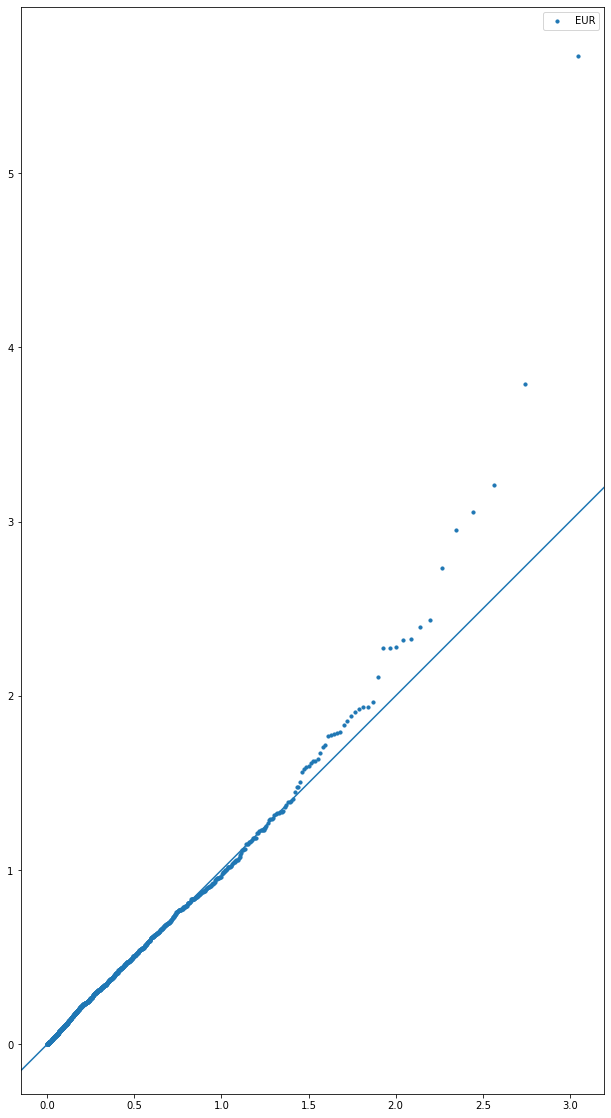

In [41]:
plt.rcParams['figure.figsize'] = [20, 20]

assocs_afr = pd.read_csv("14_11_data/saige_variant_chr20/AFR.txt", sep='\t')
assocs_sas = pd.read_csv("14_11_data/saige_variant_chr20/SAS.txt", sep='\t')
assocs_eur = pd.read_csv("14_11_data/saige_variant_chr20/EUR.txt", sep='\t')

fig, ax = plt.subplots()

print(assocs_afr, assocs_sas, assocs_eur)

#ax.scatter([-math.log(p) for p in np.linspace(0, 1, num=len(assocs_afr["p.value"])+1)[1:]],
#           [-math.log(p) for p in assocs_afr["p.value"].sort_values()], label="AFR",s=10)

#ax.scatter([-math.log(p) for p in np.linspace(0, 1, num=len(assocs_sas["p.value"])+1)[1:]],
#           [-math.log(p) for p in assocs_sas["p.value"].sort_values()], label="SAS",s=10)

ax.scatter([-math.log10(p) for p in np.linspace(0, 1, num=len(assocs_eur[assocs_eur["AC_Allele2"] > 20]["p.value"])+1)[1:]],
           [-math.log10(p) for p in assocs_eur[assocs_eur["AC_Allele2"] > 20]["p.value"].sort_values()], label="EUR",s=10)

ax.axline((0, 0), slope=1)
ax.set_aspect('equal', adjustable='box')

ax.legend()

plt.show()


In [12]:
gene_associations["Region"][1:4] = [1]*3

/tmp/ipykernel_190974/2816642777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_associations["Region"][1:4] = [1]*3


In [28]:
gene_bass[(gene_bass["Chrom"] == "20") | (gene_bass["Chrom"] == "21")].sort_values(by="P‑Value Burden")

,Gene Name,Gene Id,P‑Value SKATO,P‑Value Burden,P‑Value SKAT,BETA Burden,Burden Set,Chrom : Position,Chrom,Position,Details
7,KRTAP10-8,ENSG00000187766,0.000106,0.000237,0.000104,0.078679,pLoF,2.104461e+10,21,44612022.0,NaN
47,C2CD2,ENSG00000157617,0.001400,0.002338,0.001748,-0.020249,pLoF,2.104189e+10,21,41889081.0,NaN
43,ADNP,ENSG00000101126,0.001239,0.003616,0.001158,0.041304,pLoF,2.005089e+10,20,50890832.0,NaN
174,MYL9,ENSG00000101335,0.007048,0.003738,0.060981,-0.050653,pLoF,2.003654e+10,20,36544791.0,NaN
171,ARFGEF2,ENSG00000124198,0.006989,0.003879,0.093231,0.030322,pLoF,2.004892e+10,20,48921762.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13764,KRTAP6-1,ENSG00000184724,0.756549,NaN,NaN,NaN,pLoF,2.103061e+10,21,30613507.0,NaN
14488,KRTAP10-7,ENSG00000272804,0.793099,NaN,NaN,NaN,pLoF,2.104460e+10,21,44600515.0,NaN
15228,SPINT3,ENSG00000101446,0.828757,NaN,NaN,NaN,pLoF,2.004551e+10,20,45512583.0,NaN
15752,SSTR4,ENSG00000132671,0.856414,NaN,NaN,NaN,pLoF,2.002304e+10,20,23035400.0,NaN


In [18]:
gene_associations[(gene_associations["Group"] == "pLoF") & (gene_associations["max_MAF"] == 0.01)].sort_values(by="Pvalue_Burden")

,Region,Group,max_MAF,Pvalue,Pvalue_Burden,Pvalue_SKAT,BETA_Burden,SE_Burden,MAC,MAC_case,MAC_control,Number_rare,Number_ultra_rare
6481,ADNP,pLoF,0.01,0.000338,0.000168,0.000529,0.050083,0.013308,48.0,26.0,22.0,1.0,11.0
5908,SLC12A5,pLoF,0.01,0.000486,0.000286,0.001489,0.067383,0.018575,27.0,15.0,12.0,1.0,13.0
2449,NXT1,pLoF,0.01,0.000415,0.000415,0.000415,0.132810,0.037621,5.0,5.0,0.0,0.0,4.0
3648,ITCH,pLoF,0.01,0.001263,0.001263,0.001263,0.049650,0.015399,36.0,20.0,16.0,0.0,22.0
6866,BMP7,pLoF,0.01,0.001414,0.001414,0.001414,0.085477,0.026780,13.0,8.0,5.0,0.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102,ABHD16B,pLoF,0.01,1.000000,0.994878,0.955058,0.000130,0.020228,288.0,88.0,200.0,7.0,19.0
3994,SPAG4,pLoF,0.01,0.795947,1.000000,0.609883,-0.000022,inf,300.0,86.0,214.0,7.0,36.0
2167,SCP2D1,pLoF,0.01,1.000000,1.000000,1.000000,0.000073,inf,179.0,51.0,128.0,2.0,3.0
1984,MX2,pLoF,0.01,1.000000,1.000000,0.907502,-0.000051,inf,291.0,86.0,205.0,6.0,35.0


In [1]:
import tqdm